<a href="https://colab.research.google.com/github/NavyaShetty-97/NavyaShetty-97.github.io/blob/master/Titanic_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train= pd.read_csv('train.csv')
train.shape
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test= pd.read_csv('test.csv')
test.shape
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


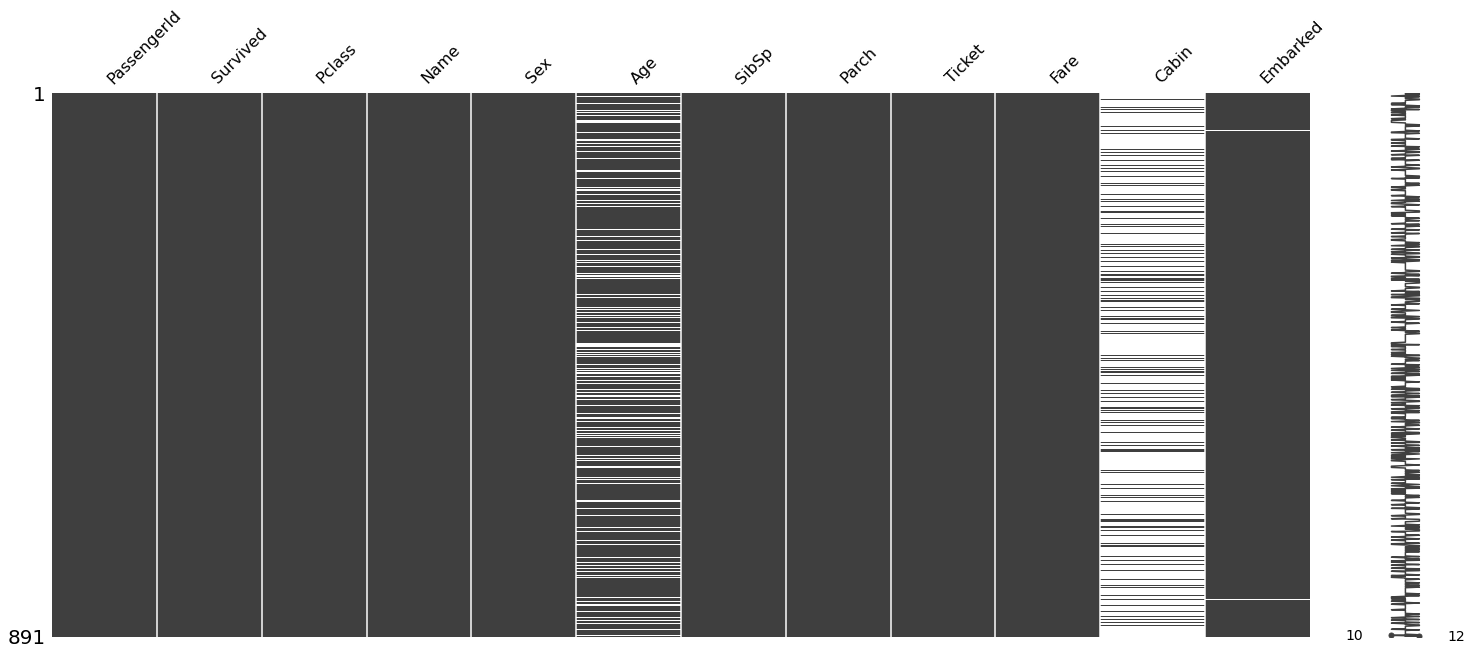

In [ ]:
import missingno as mn
mn.matrix(train)

In [ ]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

In [ ]:
train.Embarked.fillna('S', inplace=True)
train.drop('Cabin',axis=1,inplace=True)
train.drop('Fare',axis=1,inplace=True)
train.drop('Ticket',axis=1,inplace=True)
train.drop('Name',axis=1,inplace=True)
train.drop('PassengerId',axis=1,inplace=True)
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [ ]:
test.Embarked.fillna('S', inplace=True)
test.drop('Cabin',axis=1,inplace=True)
test.drop('Fare',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

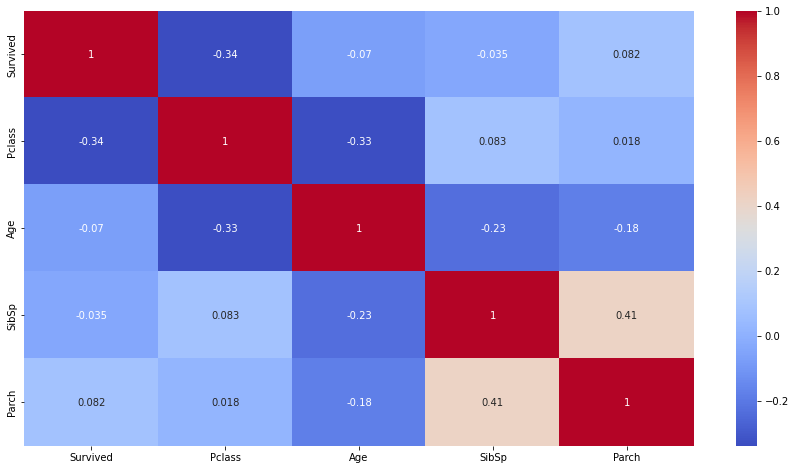

In [ ]:
plt.subplots(figsize=(15,8))
sns.heatmap(train.corr(),annot=True,cmap="coolwarm")

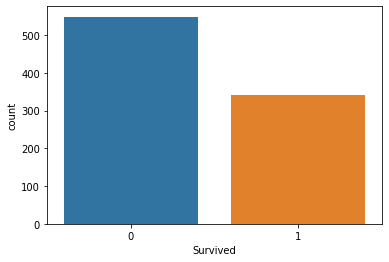

In [ ]:
sns.countplot(x='Survived',data=train)

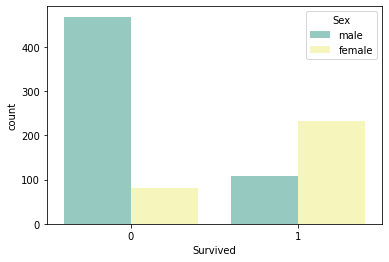

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=train, palette="Set3")

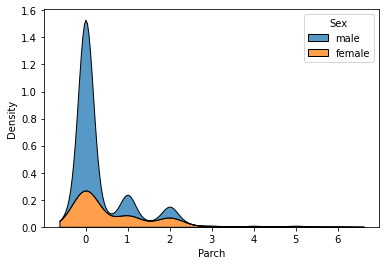

In [ ]:
sns.kdeplot(data=train, x="Parch", hue="Sex", multiple="stack")

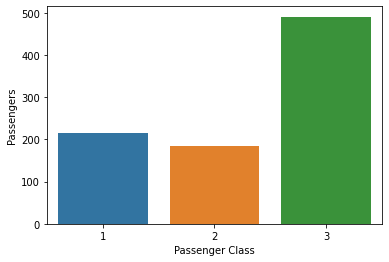

In [ ]:
sns.countplot(x='Pclass', data=train)
plt.xlabel('Passenger Class')
plt.ylabel('Passengers')
plt.show()

In [ ]:
train.loc[train.Sex=='female','Sex']=1
train.loc[train.Sex=='male','Sex']=0
test.loc[test.Sex=='female','Sex']=1
test.loc[test.Sex=='male','Sex']=0
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [ ]:
train["Sex"] = train["Sex"].astype(float).astype(int)
test["Sex"] = test["Sex"].astype(float).astype(int)
train["Sex"] = train["Age"].astype(float).astype(int)
test["Sex"] = test["Age"].astype(float).astype(int)

In [ ]:
train.loc[train.Embarked =='S','Embarked']= 3
train.loc[train.Embarked =='C','Embarked']=2
train.loc[train.Embarked =='Q','Embarked']=1
test.loc[test.Embarked =='S','Embarked']= 3
test.loc[test.Embarked =='C','Embarked']=2
test.loc[test.Embarked =='Q','Embarked']=1
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Embarked     418 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 23.0+ KB


In [ ]:
train_x= train.drop(columns=["Survived"], axis=1)
train_y= train["Survived"]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 48.9+ KB


In [ ]:
test_x= test.drop("PassengerId",axis=1)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,22,22.0,1,0,3
1,1,1,38,38.0,1,0,2
2,1,3,26,26.0,0,0,3
3,1,1,35,35.0,1,0,3
4,0,3,35,35.0,0,0,3


In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,34,34.5,0,0,1
1,893,3,47,47.0,1,0,3
2,894,2,62,62.0,0,0,1
3,895,3,27,27.0,0,0,3
4,896,3,22,22.0,1,1,3


In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "SibSp","Sex", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
print(model.score(X, y))

0.7485970819304153


In [ ]:
train_X= train.drop(columns=["Survived"], axis=1)
train_y= train["Survived"]
test_X= test.drop("PassengerId",axis=1)

In [ ]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier= KNeighborsClassifier(n_neighbors=3)
KNN_Classifier.fit(train_X, train_y)
predict_knn = KNN_Classifier.predict(test_X)
print(KNN_Classifier.score(train_X, train_y))

0.7856341189674523


In [ ]:
#Final Submission
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived':predict_knn})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
